### Business Understanding :

Consumer Price Index measures the monthly change in prices paid by Indian consumers. This data consist every states CPI Monthly from 2011 to 2022.

### Aim :

 To forecast the CPI for any State

### Let's get started...

### 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

### 2. Read and understand the data

In [2]:
data = pd.read_csv('CPI_2022.csv')
data.head()

,Sector,Year,Month,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
0,Rural,2011,January,104.0,NaN,104.0,NaN,105.0,NaN,103.0,...,103.0,NaN,104.0,105.0,104.0,104.0,103.0,104.0,103.0,106.0
1,Urban,2011,January,103.0,NaN,103.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,105.0,103.0,104.0,103.0,104.0,102.0,105.0
2,Rural,2011,February,107.0,NaN,105.0,NaN,107.0,NaN,105.0,...,104.0,NaN,107.0,105.0,104.0,107.0,104.0,105.0,104.0,107.0
3,Urban,2011,February,106.0,NaN,106.0,NaN,106.0,NaN,105.0,...,105.0,NaN,108.0,104.0,103.0,106.0,104.0,105.0,105.0,108.0
4,Rural,2011,March,103.1,NaN,103.8,NaN,103.9,NaN,103.9,...,103.9,NaN,104.8,106.8,103.9,105.8,104.1,105.5,108.6,104.7


In [3]:
# Check the shape of the data
data.shape

(268, 39)

In [4]:
data_ap = data[['Sector','Year','Month','Andhra Pradesh']]

In [5]:
# Check the overall info
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          268 non-null    object 
 1   Year            268 non-null    int64  
 2   Month           268 non-null    object 
 3   Andhra Pradesh  262 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


In [6]:
# Check the numerical data stats
data_ap.describe()

,Year,Andhra Pradesh
count,268.000000,262.000000
mean,2016.111940,135.543588
std,3.258318,17.581006
min,2011.000000,3.640000
25%,2013.000000,126.600000
50%,2016.000000,136.600000
75%,2019.000000,143.425000
max,2022.000000,173.100000


### 3. Exploratory Data Analysis

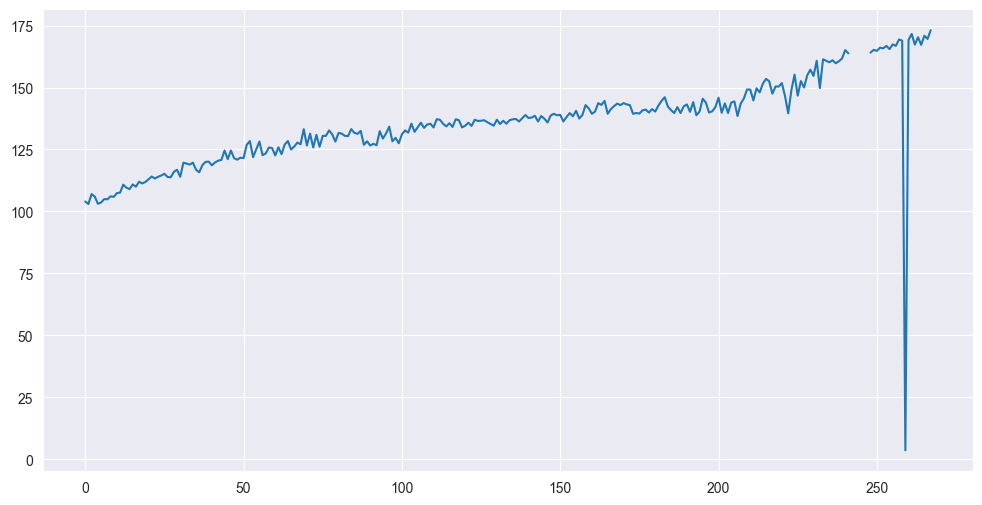

In [8]:
plt.figure(figsize=(12,6))
data_ap['Andhra Pradesh'].plot()
plt.show()

**3.1 Missing values**

In [9]:
data_ap.isnull().sum()

Sector            0
Year              0
Month             0
Andhra Pradesh    6
dtype: int64

**Inference: There are some missing values in the data. We have to treat them.**

In [10]:
data_ap[data_ap['Andhra Pradesh'].isnull()] # Think Why ?

,Sector,Year,Month,Andhra Pradesh
242,Rural,2021,March,NaN
243,Urban,2021,March,NaN
244,Rural,2021,April,NaN
245,Urban,2021,April,NaN
246,Rural,2021,May,NaN
247,Urban,2021,May,NaN


In [11]:
data_ap['Andhra Pradesh'] = data_ap['Andhra Pradesh'].fillna(method = 'ffill')

**3.2 Outliers**

In [12]:
data_ap.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Year,Andhra Pradesh
count,268.000000,268.000000
mean,2016.111940,136.176194
std,3.258318,17.879775
min,2011.000000,3.640000
25%,2013.000000,126.675000
50%,2016.000000,136.800000
75%,2019.000000,143.750000
90%,2021.000000,162.330000
95%,2021.000000,165.995000
99%,2022.000000,170.498000


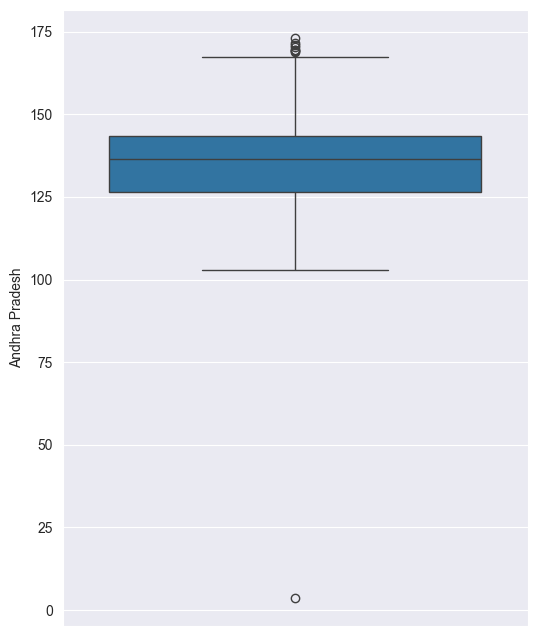

In [17]:
plt.figure(figsize=(6,8))
sns.boxplot(data['Andhra Pradesh']) # import seaborn as sns
plt.show()

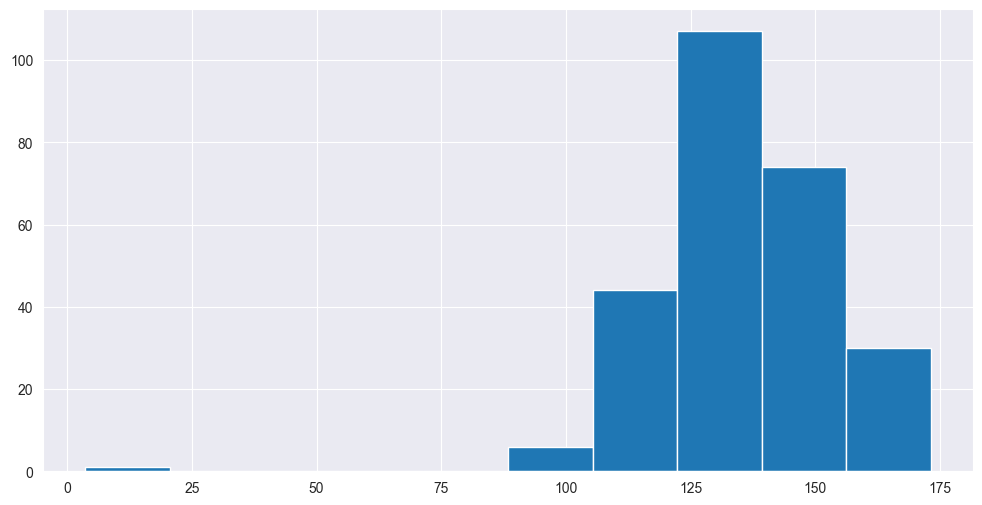

In [18]:
plt.figure(figsize=(12,6))
plt.hist(data['Andhra Pradesh'])
plt.show()

In [19]:
data_ap[data_ap['Andhra Pradesh']<10]

,Sector,Year,Month,Andhra Pradesh
259,Urban,2021,November,3.64


In [20]:
data_ap.loc[257:261]

,Sector,Year,Month,Andhra Pradesh
257,Urban,2021,October,169.40
258,Rural,2021,November,168.90
259,Urban,2021,November,3.64
260,Rural,2021,December,169.20
261,Urban,2021,December,171.60


In [21]:
data_ap.loc[259,'Andhra Pradesh'] = (data_ap.loc[257,'Andhra Pradesh'] + data_ap.loc[261,'Andhra Pradesh'])/2

In [22]:
data_ap.loc[257:261]

,Sector,Year,Month,Andhra Pradesh
257,Urban,2021,October,169.4
258,Rural,2021,November,168.9
259,Urban,2021,November,170.5
260,Rural,2021,December,169.2
261,Urban,2021,December,171.6


* Inference: We can clearly see that there are outliers in the data. But some of them are not outliers, data might not have been collected or there is no data at all, we have fill up those data for our analysis.
* Over here see the date it's Post Lockdown time.

### 4. Data Preparation

In [23]:
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          268 non-null    object 
 1   Year            268 non-null    int64  
 2   Month           268 non-null    object 
 3   Andhra Pradesh  268 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


In [24]:
data_ap.isnull().sum()

Sector            0
Year              0
Month             0
Andhra Pradesh    0
dtype: int64

In [25]:
data_ap.head()

,Sector,Year,Month,Andhra Pradesh
0,Rural,2011,January,104.0
1,Urban,2011,January,103.0
2,Rural,2011,February,107.0
3,Urban,2011,February,106.0
4,Rural,2011,March,103.1


**Concatenating Month and Year into Date column to date time format.**

In [26]:
month_map={'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
           'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}

In [27]:
data_ap['Month'] = data_ap['Month'].map(month_map)

In [28]:
data_ap

,Sector,Year,Month,Andhra Pradesh
0,Rural,2011,1,104.0
1,Urban,2011,1,103.0
2,Rural,2011,2,107.0
3,Urban,2011,2,106.0
4,Rural,2011,3,103.1
...,...,...,...,...
263,Urban,2022,1,170.3
264,Rural,2022,2,167.2
265,Urban,2022,2,170.9
266,Rural,2022,3,169.6


In [29]:
from datetime import datetime
data_ap['Date'] = data_ap.apply(lambda row: datetime.strptime(f"{int(row.Year)}/{int(row.Month)}/{int(1)}", '%Y/%m/%d'), axis=1)

In [31]:
data_ap.head()

,Sector,Year,Month,Andhra Pradesh,Date
0,Rural,2011,1,104.0,2011-01-01
1,Urban,2011,1,103.0,2011-01-01
2,Rural,2011,2,107.0,2011-02-01
3,Urban,2011,2,106.0,2011-02-01
4,Rural,2011,3,103.1,2011-03-01


In [32]:
# Group the data by Date to aggregate rural and urban
data1 = data_ap.groupby(['Date'])['Andhra Pradesh'].median().reset_index()
data1.head()

,Date,Andhra Pradesh
0,2011-01-01,103.50
1,2011-02-01,106.50
2,2011-03-01,103.35
3,2011-04-01,104.95
4,2011-05-01,105.99


### 5. Time series Decomposition

In [33]:
data1 = pd.DataFrame(data1) # Convert to data frame

In [34]:
data1 = data1.set_index(["Date"])

In [35]:
data1.head()

,Andhra Pradesh
Date,
2011-01-01,103.50
2011-02-01,106.50
2011-03-01,103.35
2011-04-01,104.95
2011-05-01,105.99


In [36]:
data1.index.dtype

dtype('<M8[ns]')

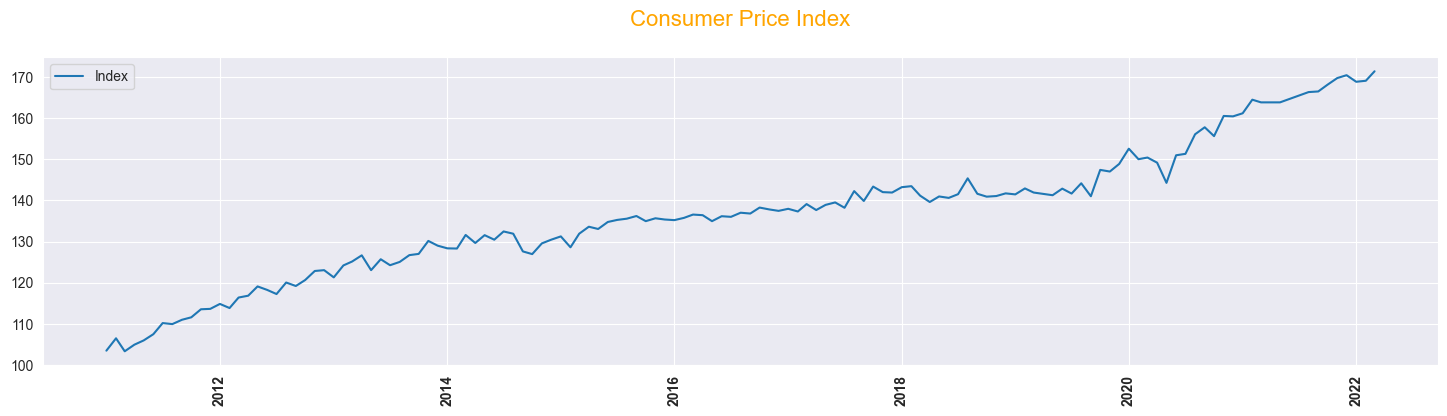

In [37]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Index')
plt.legend(loc='best')
plt.title('Consumer Price Index\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Orange'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

**Additive seasonal decomposition** : y = trend + seasonality + error

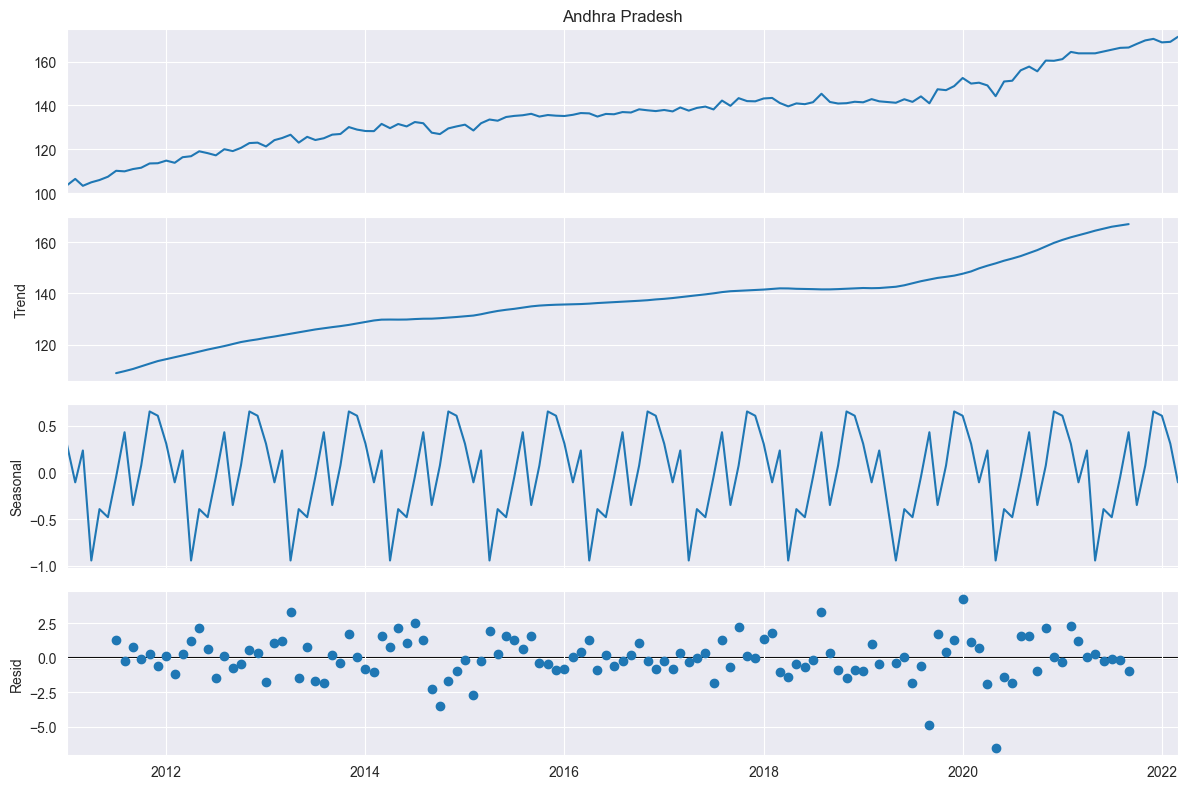

In [38]:
from pylab import rcParams
from scipy.fftpack import fftfreq # Fast Fourier Transform
# Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1['Andhra Pradesh'], model='additive',period=12) # additive seasonal
# print(decomposition.trend) , # .seasonal, .resid
fig = decomposition.plot()
plt.show()

**Multiplicative seasonal decomposition** : y = trend*seasonality + error

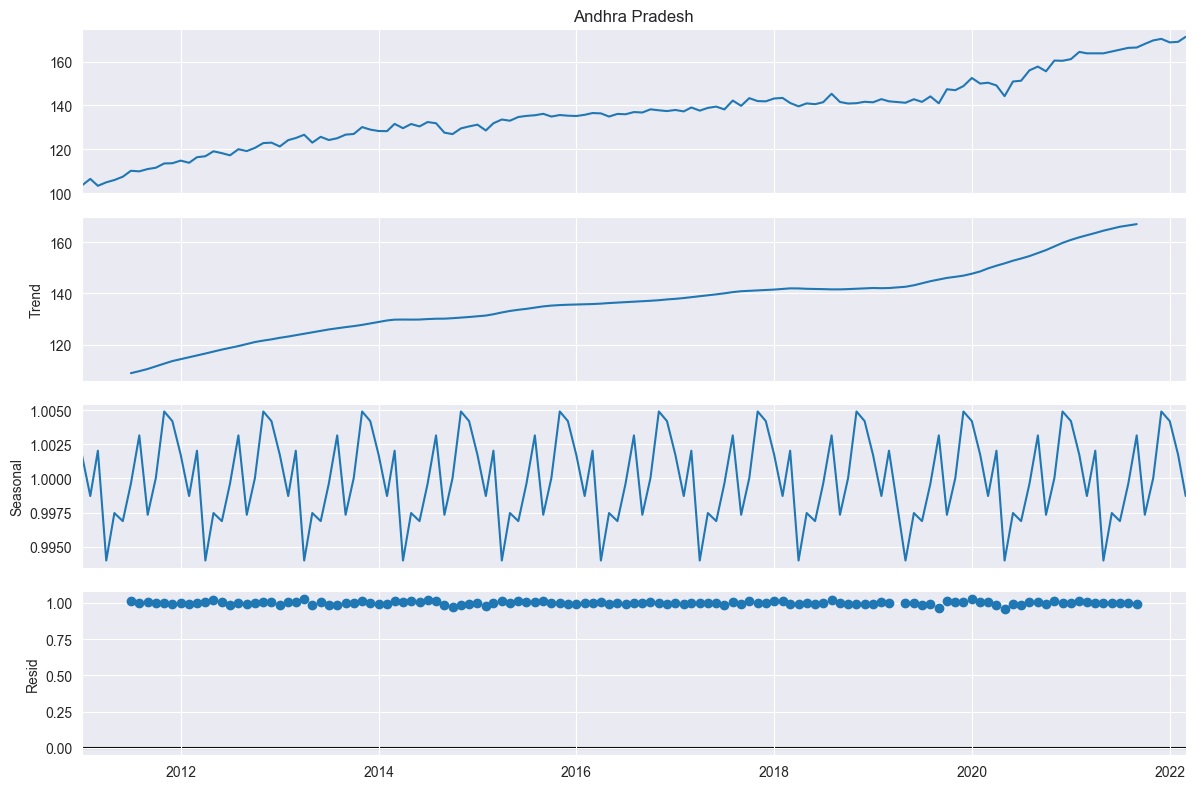

In [39]:
decomposition = sm.tsa.seasonal_decompose(data1['Andhra Pradesh'], model='multiplicative', period=12) # multiplicative seasonal
fig = decomposition.plot()
plt.show()

**Inference : The data contains level, trend but not seasonality.**

**Split the data into train and test sets.**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train , test = train_test_split(data1['Andhra Pradesh'], train_size = 0.8, shuffle = False)
# X, y  - Input, Output - There is just output

In [43]:
train.shape

(107,)

In [44]:
train = pd.DataFrame(train)

In [45]:
test = pd.DataFrame(test)

### We build a Time Series Forecast models and compare the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) values for the models. Lower values of RMSE and MAPE are desired to conclude that a model performs better. Accuracy is calculated as (100 - MAPE). Lower the MAPE value, higher is the accuracy.

### To make the series stationary, we need to perform transformation and differencing.

### Check whether the time series is stationary

- Average / Mean / Expected Value of the time series is constant throughout different periods
- Standard Deviation / Variance of the time series is constant throughout different periods
- There is no seasonality in the data

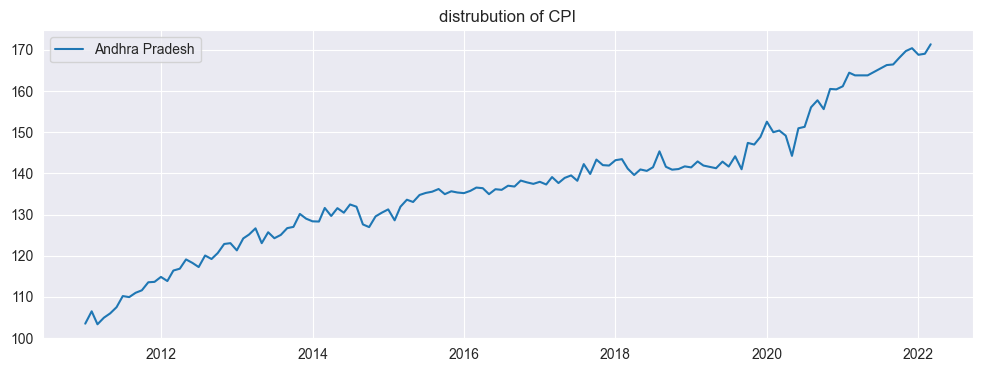

In [46]:
plt.figure(figsize=(12,4))
plt.plot(data1['Andhra Pradesh'], label = 'Andhra Pradesh')
plt.legend(loc='best')
plt.title('distrubution of CPI')
plt.show()

### Augmented Dickey-Fuller (ADF) test : To inference if the time series is stationary or not using p-values

In [47]:
from statsmodels.tsa.stattools import adfuller
# Hypothesis Test
# Null hypothesis - The time series is stationary - unit root
# Alternate Hypothesis - The time series is not stationary

# p-value < 0.05 # 95% confidence that you accept the null hypothesis - the TS is stationary
# p-value >=0.05 # reject the Null hypothesis - TS is not stationary - assumptions are not met yet

adf_test = adfuller(data1['Andhra Pradesh'])
print(adf_test)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

(-0.10792167739338306, 0.9486437651869097, 1, 132, {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}, 490.4504893024833)
ADF Statistic: -0.107922
Critical Values @ 0.05: -2.88
p-value: 0.948644


**Inference : p-value is greater than 0.05. This means that the series is not stationary.**

### Log transformation to make variance constant

In [49]:
data1.head()

,Andhra Pradesh
Date,
2011-01-01,103.50
2011-02-01,106.50
2011-03-01,103.35
2011-04-01,104.95
2011-05-01,105.99


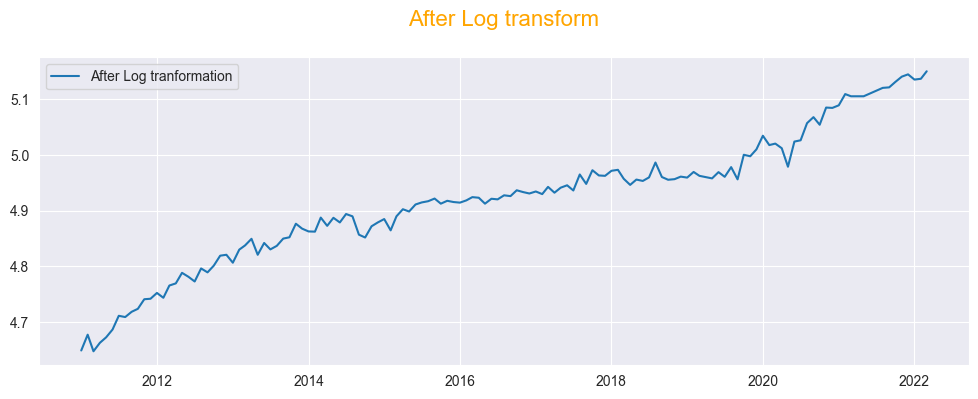

In [54]:
# Tranforms non-gaussian distribution data into gaussian distribution ( normal distribution )
data_log= np.log1p(data1['Andhra Pradesh'])

plt.figure(figsize=(12,4))
plt.plot(data_log, label='After Log tranformation')
plt.legend(loc='best')
plt.title('After Log transform\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Orange'})
plt.show()

### Differencing to remove trend

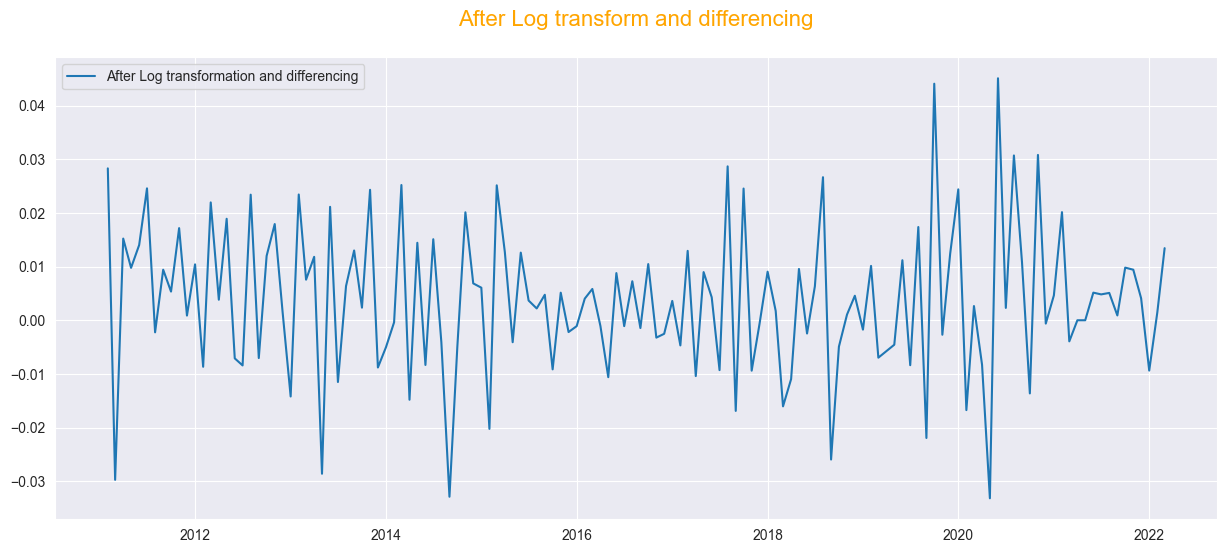

In [55]:
data_log_diff = pd.Series(data_log - data_log.shift(), data1.index)
plt.figure(figsize=(15,6))
plt.plot(data_log_diff, label='After Log transformation and differencing')
plt.legend(loc='best')
plt.title('After Log transform and differencing\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Orange'})
plt.show()

In [56]:
data_log_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

In [57]:
data_log_diff.tail()

Date
2021-11-01    0.009417
2021-12-01    0.004092
2022-01-01   -0.009379
2022-02-01    0.001471
2022-03-01    0.013435
Name: Andhra Pradesh, dtype: float64

**Now let us see whether our series has become stationary.**

### Augmented Dickey-Fuller (ADF) test

In [58]:
adf_test = adfuller(data_log_diff)

print('ADF Statistic: %f' % adf_test[0]) # Smaller value indicates higher stationarity, rejecting null hypothesis
print('p-value: %f' % adf_test[1])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])

ADF Statistic: -17.470397
p-value: 0.000000
Critical Values @ 0.05: -2.88


**Inference : p-value is less than 0.05. This means that the series is stationary.**

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test : Opposite interpretation of ADF Test

In [59]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_log_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.205561
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21268\3299965685.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data_log_diff)


**Inference : p-value is greater than 0.05. This means the series is stationary.**

After one order difference this time series become stationary so d will be 1

### Now let us proceed towards building various AR models to forecast the Sales.

first, we need to take care of its assumptions about the data and determine the parameters of the ARIMA(p, d, q) model. for d we already have the value

The next step in the ARIMA model is computing “p,” or the order for the autoregressive model. We can inspect the autocorrelation plot, which measures the correlation between the time-series data and a certain lag. Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.

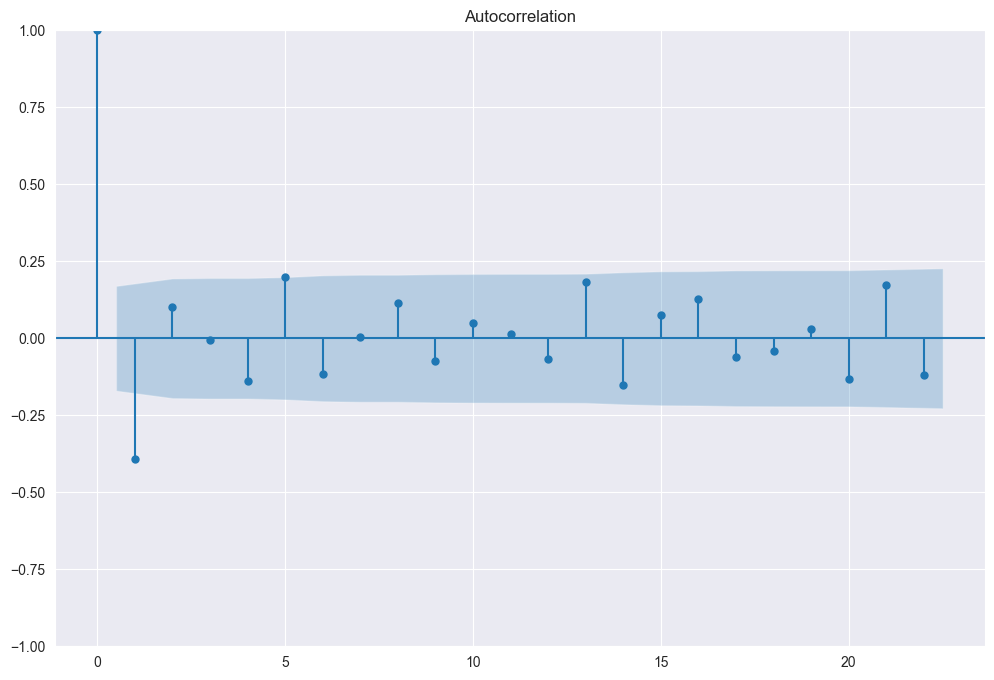

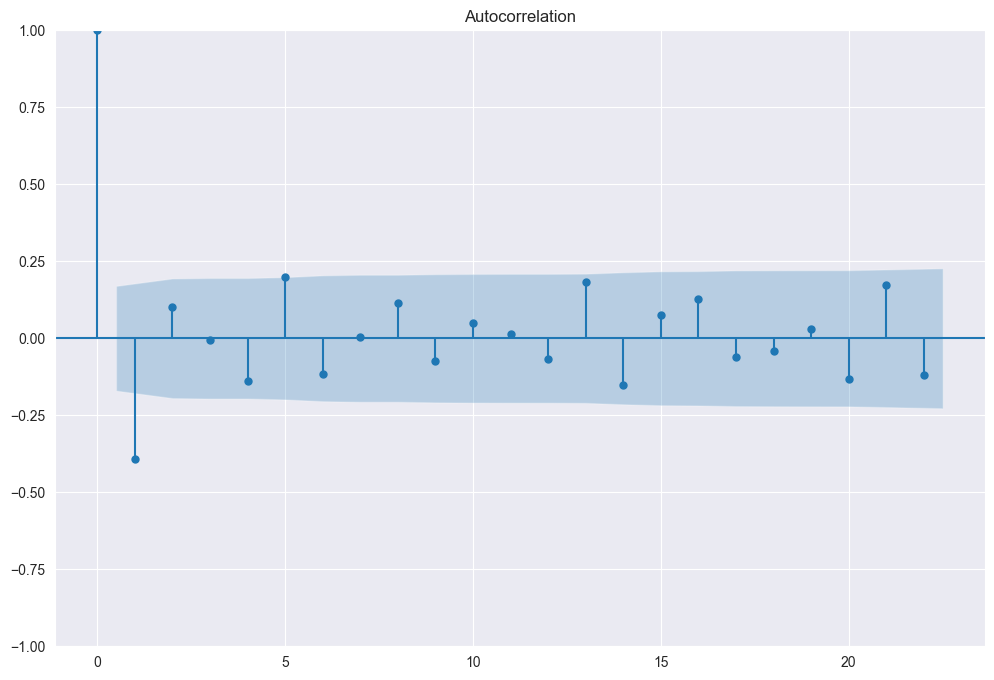

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_log_diff)

Finally, “q” can be estimated similarly by looking at the PACF plot instead of the ACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be between 7 and 9.

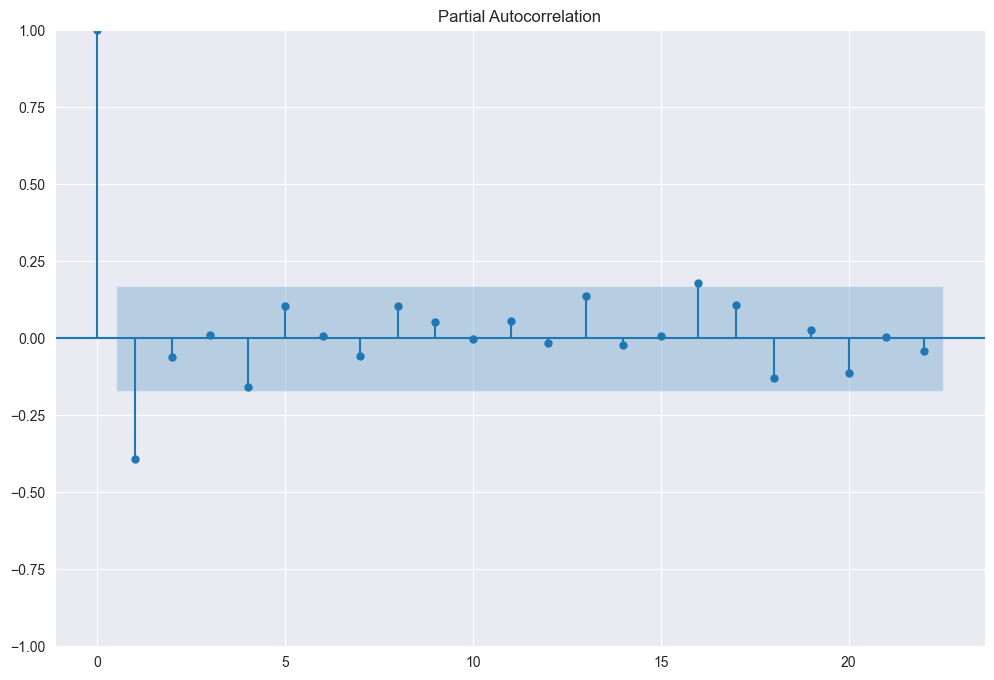

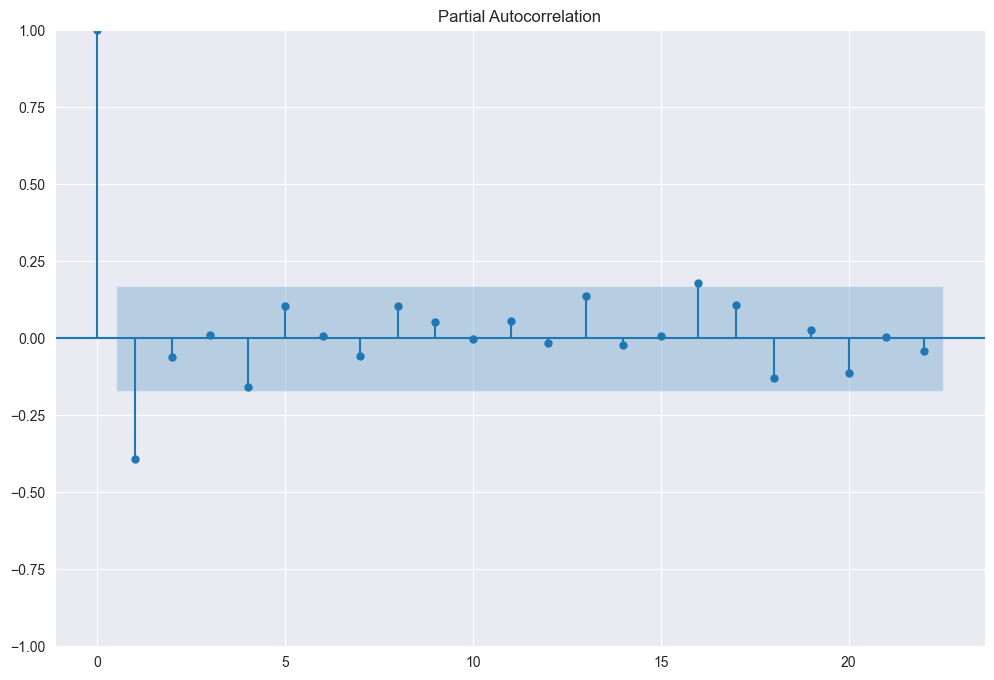

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_log_diff)

# Fit an ARIMA model

In [139]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_log_diff, order=(12, 1, 4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Andhra Pradesh   No. Observations:                  133
Model:                ARIMA(12, 1, 4)   Log Likelihood                 388.648
Date:                Sat, 31 Aug 2024   AIC                           -743.296
Time:                        10:47:25   BIC                           -694.288
Sample:                             0   HQIC                          -723.381
                                - 133                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0885      0.783     -1.390      0.165      -2.623       0.446
ar.L2         -0.8822      1.243     -0.709      0.478      -3.319       1.555
ar.L3         -0.7769      1.203     -0.646      0.518      -3.134       1.580
ar.L4         -0.7117      0.595     -1.195      0.232      -1.879       0.455
ar.L5         -0.5075      0.542     -0.936      0.349      -1.570       0.555
ar.L6         -0.5129      0.496     -1.034      0.301      -1.485       0.459
ar.L7         -0.4784      0.419     -1.142      0.253      -1.299       0.342
ar.L8         -0.3309      0.441     -0.750      0.453      -1.196       0.534
ar.L9         -0.2790      0.337     -0.829      0.407      -0.939       0.381
ar.L10        -0.2616      0.274     -0.954      0.340      -0.799       0.276
ar.L11        -0.1993      0.250     -0.797      0.425      -0.689       0.291
ar.L12        -0.1559      0.126     -1.241      0.215      -0.402       0.090
ma.L1         -0.2946      0.783     -0.376      0.707      -1.830       1.240
ma.L2         -0.1193      0.881     -0.135      0.892      -1.845       1.607
ma.L3         -0.1202      0.832     -0.145      0.885      -1.750       1.510
ma.L4         -0.0985      0.827     -0.119      0.905      -1.719       1.522
sigma2         0.0002   1.93e-05      8.149      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.05
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               1.10   Skew:                            -0.28
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
# Recover original time series
y_hat_ar = data_log_diff.copy()
y_hat_ar['ar_forecast_log_diff'] = model_fit.predict(data_log_diff.index.min(), data_log_diff.index.max())
y_hat_ar['ar_forecast_log'] = y_hat_ar['ar_forecast_log_diff'].cumsum() # Y(t) = Z(t) + Z(t-1) + Z(t-2) +.....
y_hat_ar['ar_forecast_log'] = y_hat_ar['ar_forecast_log'].add(data_log[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_log']) # Inverse transform

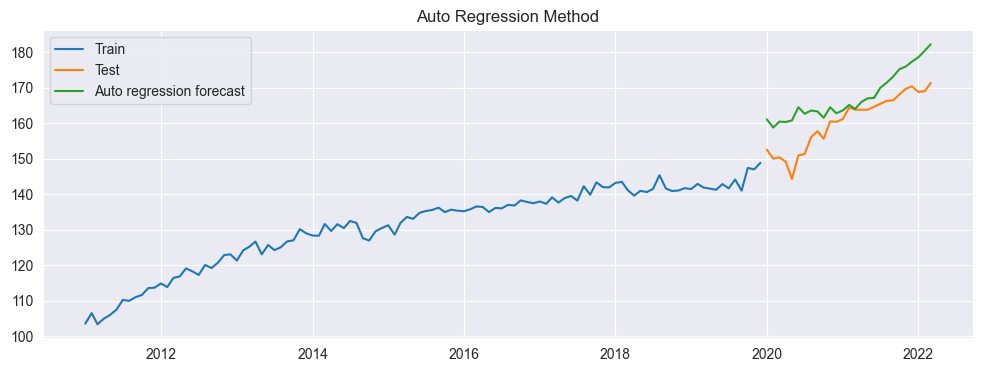

In [141]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Andhra Pradesh'], label='Train')
plt.plot(test['Andhra Pradesh'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [142]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Andhra Pradesh'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Andhra Pradesh']-y_hat_ar['ar_forecast'][test.index.min():])/test['Andhra Pradesh'])*100,2)
print(mape)

4.35


In [143]:
future_predict=model_fit.predict(start = len(data1), end = (len(data1)) + 6)
future_predict= future_predict.cumsum()
future_predict = future_predict.add(data_log[0])
future_predict = np.exp(future_predict)

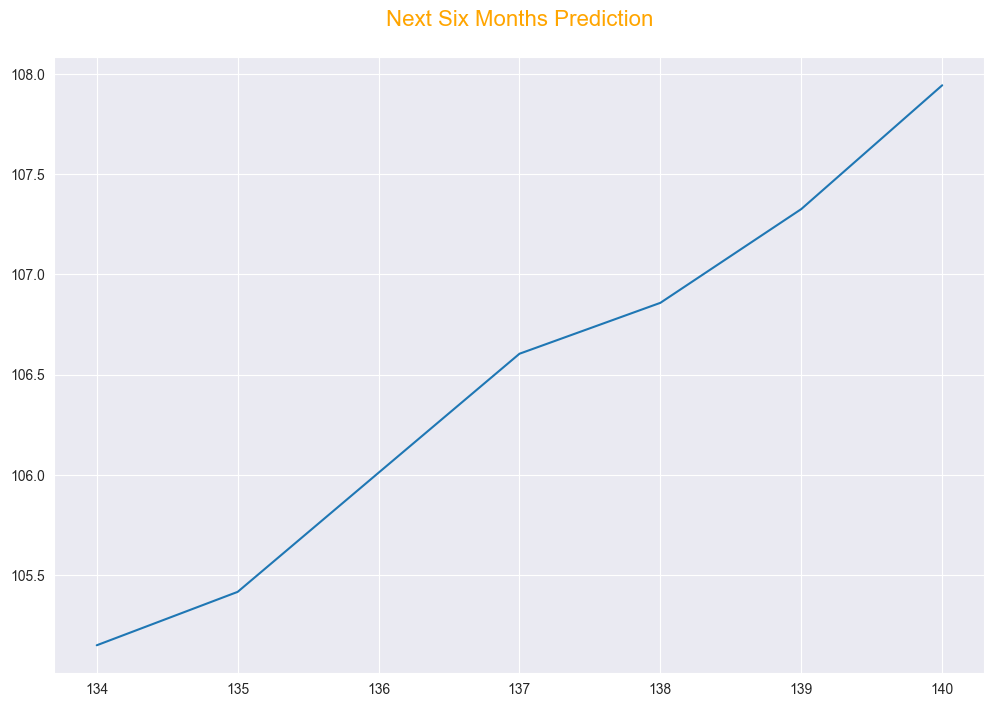

In [144]:
future_predict.plot()
plt.title('Next Six Months Prediction\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Orange'})
plt.show()